In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime 

In [3]:
file_paths = ["Reddit2015andBefore.csv", "Reddit2018to2015.csv", "Reddit2019.csv", "RedditJan2020_July2020.csv"]

count_dict = {}

for path in file_paths:
    dataframe = pd.read_csv(path, index_col = False)

    for index, row in dataframe.iterrows():
        dt = datetime.strptime(row["created"],"%Y-%m-%d %H:%M:%S")
        if dt.date() in count_dict:
            count_dict[dt.date()] += 1 + row["comms_num"]
        else:
            count_dict[dt.date()] = 1 + row["comms_num"]

df = pd.DataFrame.from_dict(count_dict, orient="index", columns= ["Post & Comment Count"])

print("DataFrame Created")

DataFrame Created


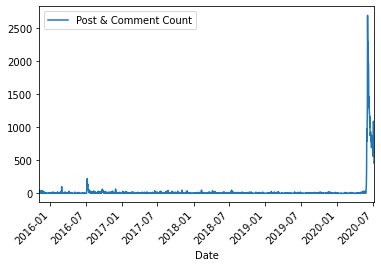

In [4]:
AxeObj = df.plot(kind="line")
AxeObj.set_xlabel("Date")

# AxeObj.set_xlim(left=datetime(2020,5,1))

# AxeObj.set_xticklabels(AxeObj.get_xticklabels(), rotation=45)

figure = AxeObj.get_figure()

figure.autofmt_xdate(rotation=45)
# print(AxeObj)
figure.savefig("Test.png", dpi = 300)
